In [1]:
# Manuel Duran
# Project 3
# Tennis Betting Analysis

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.style.use('seaborn-dark-palette')
import os
import seaborn as sns 
from subprocess import check_output

In [4]:
Tennis_Bet_DF = pd.read_csv('FinalTennisDataSet.csv', encoding = 'latin1') 
Tennis_Bet_DF.WRank = pd.to_numeric(Tennis_Bet_DF.WRank, errors = 'coerce') 
Tennis_Bet_DF.LRank = pd.to_numeric(Tennis_Bet_DF.LRank, errors = 'coerce')

In [22]:
Tennis_Bet_DF.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,SJL,MaxW,MaxL,AvgW,AvgL,Diff,Round_10,Round_20,Total Sets,Sets Diff
0,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,14.0,10.0,20.0,2.0,6.0
1,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,NaN,NaN,NaN,NaN,NaN,51.0,50.0,60.0,2.0,6.0
2,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Escude N.,...,NaN,NaN,NaN,NaN,NaN,615.0,620.0,620.0,3.0,4.0
3,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Federer R.,...,NaN,NaN,NaN,NaN,NaN,22.0,20.0,20.0,2.0,7.0
4,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Fromberg R.,...,NaN,NaN,NaN,NaN,NaN,117.0,120.0,120.0,3.0,1.0


In [24]:
Tennis_Bet_DF.describe()

,ATP,Best of,WRank,LRank,W1,L1,W2,L2,W3,L3,...,SJL,MaxW,MaxL,AvgW,AvgL,Diff,Round_10,Round_20,Total Sets,Sets Diff
count,46652.000000,46652.000000,46636.000000,46554.000000,46423.000000,46423.000000,45962.000000,45963.000000,46652.000000,46652.000000,...,15579.000000,17104.000000,17104.000000,17104.000000,17104.000000,46538.00000,46538.000000,46538.000000,46461.000000,45962.000000
mean,32.931000,3.373746,59.056180,94.083086,5.792667,4.043211,5.772856,3.853621,2.756152,1.645353,...,3.558671,1.991862,9.824993,1.820060,3.706502,35.08146,35.055439,35.049207,2.547104,5.067142
std,17.953268,0.780315,73.300861,143.836733,1.239261,1.847833,1.253846,1.878397,3.064699,2.152895,...,3.272284,1.684590,458.068834,1.117214,3.455871,155.37869,155.412047,155.441995,0.801368,2.784293
min,1.000000,-1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.010000,1.010000,1.010000,1.010000,1.010000,-1464.00000,-1460.000000,-1460.000000,0.000000,-6.000000
25%,19.000000,3.000000,17.000000,35.000000,6.000000,3.000000,6.000000,2.000000,0.000000,0.000000,...,1.730000,1.270000,1.860000,1.220000,1.750000,-16.00000,-20.000000,-20.000000,2.000000,3.000000
50%,33.000000,3.000000,41.000000,66.000000,6.000000,4.000000,6.000000,4.000000,0.000000,0.000000,...,2.630000,1.560000,2.850000,1.480000,2.600000,21.00000,20.000000,20.000000,2.000000,5.000000
75%,49.000000,3.000000,77.000000,105.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.000000,...,4.000000,2.200000,4.740000,2.030000,4.090000,62.00000,60.000000,60.000000,3.000000,7.000000
max,69.000000,5.000000,1890.000000,7380.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,81.000000,76.000000,42586.000000,23.450000,36.440000,7376.00000,7380.000000,7380.000000,5.000000,17.000000


In [5]:
Tennis_Bet_DF['Diff'] =  Tennis_Bet_DF.LRank - Tennis_Bet_DF.WRank 

Tennis_Bet_DF['Round_10'] = 10*round(np.true_divide(Tennis_Bet_DF.Diff,10))
Tennis_Bet_DF['Round_20'] = 20*round(np.true_divide(Tennis_Bet_DF.Diff,20))

Tennis_Bet_DF['Total Sets'] = Tennis_Bet_DF.Wsets + Tennis_Bet_DF.Lsets

Tennis_Bet_DF.W3 = Tennis_Bet_DF.W3.fillna(0)
Tennis_Bet_DF.W4 = Tennis_Bet_DF.W4.fillna(0)
Tennis_Bet_DF.W5 = Tennis_Bet_DF.W5.fillna(0)
Tennis_Bet_DF.L3 = Tennis_Bet_DF.L3.fillna(0)
Tennis_Bet_DF.L4 = Tennis_Bet_DF.L4.fillna(0)
Tennis_Bet_DF.L5 = Tennis_Bet_DF.L5.fillna(0)

Tennis_Bet_DF['Sets Diff'] = Tennis_Bet_DF.W1+Tennis_Bet_DF.W2+Tennis_Bet_DF.W3+Tennis_Bet_DF.W4+Tennis_Bet_DF.W5 - (Tennis_Bet_DF.L1+Tennis_Bet_DF.L2+Tennis_Bet_DF.L3+Tennis_Bet_DF.L4+Tennis_Bet_DF.L5)
Final_DF = Tennis_Bet_DF

In [25]:
Final_DF.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,SJL,MaxW,MaxL,AvgW,AvgL,Diff,Round_10,Round_20,Total Sets,Sets Diff
0,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,14.0,10.0,20.0,2.0,6.0
1,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,NaN,NaN,NaN,NaN,NaN,51.0,50.0,60.0,2.0,6.0
2,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Escude N.,...,NaN,NaN,NaN,NaN,NaN,615.0,620.0,620.0,3.0,4.0
3,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Federer R.,...,NaN,NaN,NaN,NaN,NaN,22.0,20.0,20.0,2.0,7.0
4,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Fromberg R.,...,NaN,NaN,NaN,NaN,NaN,117.0,120.0,120.0,3.0,1.0


<AxesSubplot:>

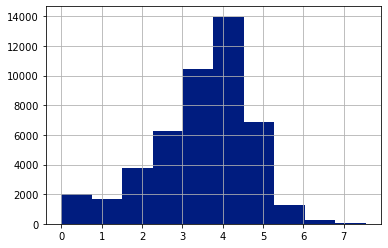

In [28]:
np.log(Final_DF['WRank']).hist()

<AxesSubplot:>

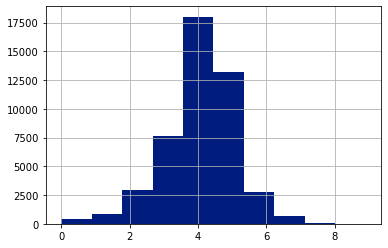

In [29]:
np.log(Final_DF['LRank']).hist()

<AxesSubplot:xlabel='Surface'>

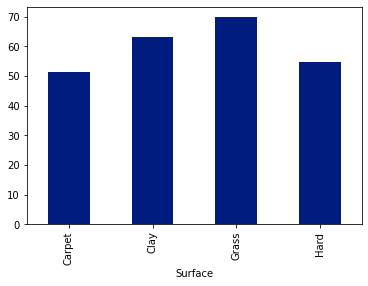

In [33]:
Final_DF.groupby("Surface").mean()["WRank"].T.plot(kind="bar")

<AxesSubplot:xlabel='Court'>

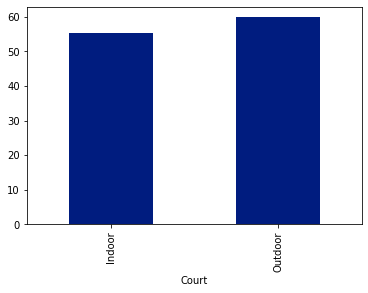

In [34]:
Final_DF.groupby("Court").mean()["WRank"].T.plot(kind="bar")

In [6]:
Non_GrandSlam_DF = Final_DF[~(Final_DF.Series == 'Grand Slam')]
GrandSlam_DF = Final_DF[Final_DF.Series == 'Grand Slam']

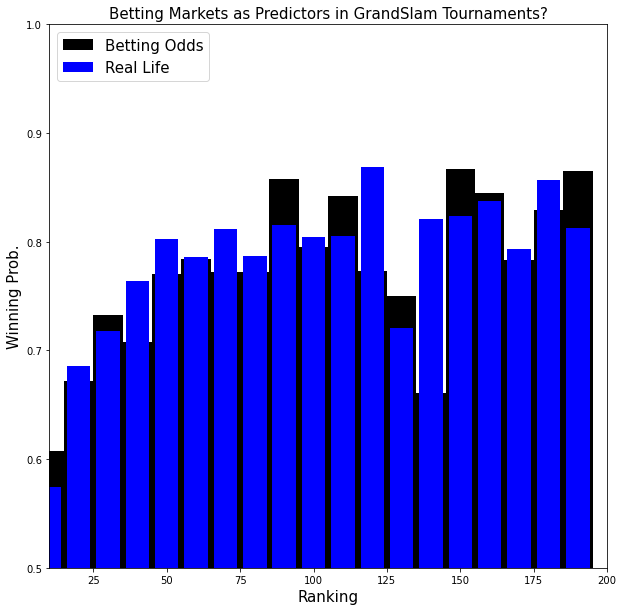

In [14]:
bins = np.arange(10,200,10)
Gs_prob = []

for bi in bins:
    
    pos = bi
    neg = -pos
    
    pos_wins = len(GrandSlam_DF[GrandSlam_DF.Round_10 == pos])
    neg_wins = len(GrandSlam_DF[GrandSlam_DF.Round_10 == neg])
    Gs_prob.append(np.true_divide(pos_wins,pos_wins + neg_wins))
    

prob = []

for bi in bins:
    
    W = np.true_divide(1,np.mean(GrandSlam_DF.AvgW[GrandSlam_DF.Round_10 == bi]))
    L = np.true_divide(1,np.mean(GrandSlam_DF.AvgL[GrandSlam_DF.Round_10 == bi]))
    ratio = np.true_divide(1,L + W)
    part_ratio = (ratio - 1)/2 + 1
    prob.append(W/part_ratio)
    
plt.figure(figsize = (10,10))    
plt.bar(bins,prob, width = 10, color = 'black')
plt.bar(bins,Gs_prob, width = 8, color = 'blue')
plt.xlabel('Ranking', fontsize = 15)
plt.ylabel('Winning Prob.', fontsize = 15)
plt.xlim([10,200])
plt.ylim([0.5,1])
plt.title('Betting Markets as Predictors in GrandSlam Tournaments?', fontsize = 15)
plt.legend(['Betting Odds','Real Life'], loc = 2, fontsize = 15)
plt.show()

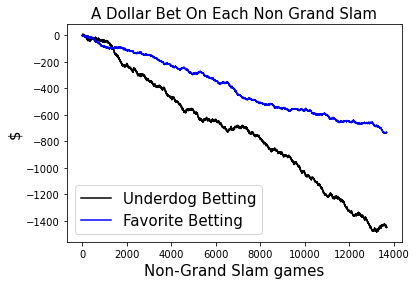

In [20]:
Non_GrandSlam_DF = Non_GrandSlam_DF[~np.isnan(Non_GrandSlam_DF.AvgW)]
mo_over = 0
mo_under = 0
tracking_over = []
tracking_under = []

for row in Non_GrandSlam_DF.iterrows():
    
    if row[1].Diff>0:
        mo_over = mo_over + row[1].AvgW - 1
        mo_under = mo_under - 1
        
    else:
        mo_over = mo_over - 1
        mo_under = mo_under + row[1].AvgW - 1
        
    tracking_over.append(mo_over)
    tracking_under.append(mo_under)
    
    if np.isnan(mo_over):
        break
        
    if np.isnan(mo_under):
        break


plt.figure()
plt.plot(tracking_under,'black')
plt.plot(tracking_over,'blue')
plt.xlabel('Non-Grand Slam games', fontsize = 15)
plt.ylabel('$', fontsize = 15)
plt.title('A Dollar Bet On Each Non Grand Slam', fontsize = 15)
plt.legend(['Underdog Betting', 'Favorite Betting'], loc = 3, fontsize = 15)
plt.show()

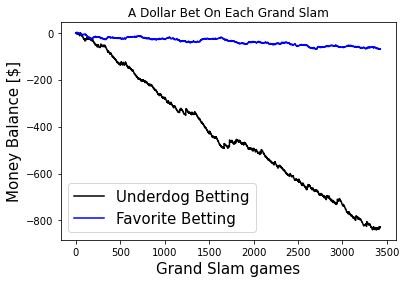

In [38]:
GrandSlam_DF = GrandSlam_DF[~np.isnan(GrandSlam_DF.AvgW)]
mo_over = 0
mo_under = 0
tracking_over = []
tracking_under = []

for row in GrandSlam_DF.iterrows():
    
    if row[1].Diff>0:
        mo_over = mo_over + row[1].AvgW - 1
        mo_under = mo_under - 1
        
    else:
        mo_over = mo_over - 1
        mo_under = mo_under + row[1].AvgW - 1
        
    tracking_over.append(mo_over)
    tracking_under.append(mo_under)
    
    if np.isnan(mo_over):
        break
        
    if np.isnan(mo_under):
        break


plt.figure()
plt.plot(tracking_under,'black')
plt.plot(tracking_over,'blue')
plt.xlabel('Grand Slam games',fontsize = 15)
plt.ylabel('Money Balance [$]', fontsize = 15)
plt.title('A Dollar Bet On Each Grand Slam')
plt.legend(['Underdog Betting', 'Favorite Betting'], loc = 3, fontsize = 15)
plt.show()